In [4]:
import math
from random import randint
from pprint import pprint

import numpy
import numpy as np
import scipy.special
import matplotlib.pyplot as plt


# Activation function for output layer
def step_function(x):
    return (x > 0) * 1


In [5]:
# neural network class definition
class neuralNetwork:

    # initialise the neural network
    def __init__(self, layers_number, initial_weight, alpha, epoch, batch_testing=1):
        self.input_node_number = layers_number[0]
        self.hidden_node_number = layers_number[1]
        self.output_node_number = layers_number[2]
        self.iteration = epoch
        self.lr = alpha

        self.batch_testing = batch_testing

        self.weight_input_hidden = numpy.array(initial_weight[0], dtype=float)
        self.weight_hidden_output = numpy.array(initial_weight[1], dtype=float)

        self.activation_function_sigmoid = lambda x: scipy.special.expit(x)
        self.activation_function_step = lambda x: step_function(x)
        self.error_by_training = []

    # train the neural network
    def train(self, dataset):
        self.error_by_training = []

        count = 0
        for epoch in range(self.iteration):

            dataset_length = len(dataset)
            selected_samples = dataset[randint(0, dataset_length - 1)]

            samples = selected_samples[0]
            label = selected_samples[1]

            inputs = numpy.array(samples, ndmin=2).T
            targets = numpy.array(label, ndmin=2).T

            hidden_inputs = numpy.dot(self.weight_input_hidden, inputs)
            hidden_outputs = self.activation_function_sigmoid(hidden_inputs)

            final_inputs = numpy.dot(self.weight_hidden_output, hidden_outputs)
            final_outputs = self.activation_function_step(final_inputs)

            # Backward 
            output_errors = targets - final_outputs
            hidden_errors = numpy.dot(self.weight_hidden_output.T, output_errors)

            self.weight_hidden_output += self.lr * numpy.dot(
                (output_errors),
                numpy.transpose(hidden_outputs),
            )

            self.weight_input_hidden += self.lr * numpy.dot(
                (hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                numpy.transpose(inputs),
            )

            count += 1
            if count > self.batch_testing:
                count = count % self.batch_testing
                self.error_by_training.append(self.testing(dataset))

    def testing(self, dataset):

        result = []
        for sample, label in dataset:
            prediction = self.query(sample)
            error = label - [prediction[0][0], prediction[1][0]]
            result.append(sum(numpy.absolute(error)))
        return sum(result)

    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.weight_input_hidden, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function_sigmoid(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.weight_hidden_output, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function_step(final_inputs)

        return final_outputs


In [6]:
# learning rate is 0.1
learning_rate = 0.1
iteration = 1000
# number of input, hidden and output nodes
input_nodes = 2
hidden_nodes = 3
output_nodes = 2

layers = [input_nodes, hidden_nodes, output_nodes]
# initial weight
initial_weight = [
    [[0.1, -0.2], [0, 0.2], [0.3, -0.4]],
    [[-0.4, 0.1, 0.6], [0.2, -0.1, -0.2]],
]


dataset = numpy.array(
    [
        [[0.6, 0.1], [1, 0]],  # [clou, vis]
        [[0.2, 0.3], [0, 1]],
        [[0.4, 0.4], [0, 1]],
        [[0.4, 0.2], [0, 1]],
        [[0.5, 0.3], [1, 0]],
        [[0.1, 0.2], [0, 1]],
        [[0.8, 0.7], [1, 0]],
    ],
    dtype=float,
)

prediction_dataset = numpy.array(
    [
        [0.4, 0.8],
        [0.8, 0.7],
        [0.3, 0.9],
        [0.1, 0.2],
    ],
)


### Intialisation of our model

In [7]:
n = neuralNetwork(layers, initial_weight, learning_rate, iteration,batch_testing=50)

### Testing our models

In [8]:
n.testing(dataset)

8.0

### Plot labled data and unlabeled data

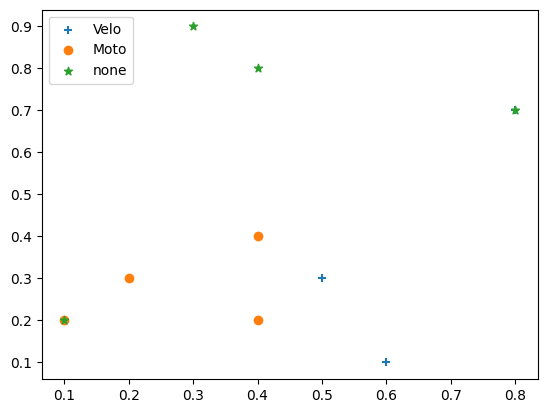

In [9]:
# create instance of neural network


my_dataset = numpy.array(
    [
        # labled
        [[0.6, 0.1], [1, 0]],  # [Velo, Moto]
        [[0.2, 0.3], [0, 1]],
        [[0.1, 0.2], [0, 1]],
        [[0.4, 0.4], [0, 1]],
        [[0.4, 0.2], [0, 1]],
        [[0.5, 0.3], [1, 0]],
        [[0.8, 0.7], [1, 0]],
        # unlabeled
        [[0.4, 0.8],[-1,-1]],
        [[0.8, 0.7],[-1,-1]],
        [[0.3, 0.9],[-1,-1]],
        [[0.1, 0.2],[-1,-1]],
    ],
)

get_x = lambda x: [i[0] for i in x]
get_y = lambda x: [i[1] for i in x]

area1, area2, area3 = [], [],[]

for sample, label in my_dataset:
    if label[0] == 1:
        area1.append(sample)
    elif label[0] == 0:
        area2.append(sample)
    else:
        area3.append(sample)

plt.scatter(get_x(area1), get_y(area1),label="Velo", marker="+")
plt.scatter(get_x(area2), get_y(area2),label="Moto", marker="o")
plt.scatter(get_x(area3), get_y(area3),label="none", marker="*")

plt.legend(['Velo', 'Moto', "none"], loc='upper left') 


plt.show()

### Show model performance before training

In [10]:
print("Samples Value\t","\t Pred [Velo, Moto]", "\t [Velo, Moto]")
for sample in dataset:
    result = list(n.query(sample))
    print('Sample:',[sample[0][0],sample[0][1]]," \t Prediction",[result[0][0], result[1][0]],"\t Label:",sample[1],)

print("\n\nNumber of errors")
print(n.testing(dataset))

Samples Value	 	 Pred [Velo, Moto] 	 [Velo, Moto]
Sample: [0.6, 0.1]  	 Prediction [1, 0] 	 Label: [1. 0.]
Sample: [0.2, 0.3]  	 Prediction [1, 0] 	 Label: [0. 1.]
Sample: [0.4, 0.4]  	 Prediction [1, 0] 	 Label: [0. 1.]
Sample: [0.4, 0.2]  	 Prediction [1, 0] 	 Label: [0. 1.]
Sample: [0.5, 0.3]  	 Prediction [1, 0] 	 Label: [1. 0.]
Sample: [0.1, 0.2]  	 Prediction [1, 0] 	 Label: [0. 1.]
Sample: [0.8, 0.7]  	 Prediction [1, 0] 	 Label: [1. 0.]


Number of errors
8.0


### Train our model

In [11]:
n.train(dataset)

print("Samples Value\t","\t Pred [Velo, Moto]", "\t [Velo, Moto]")
for sample in dataset:
    result = list(n.query(sample))
    print('Sample:',[sample[0][0],sample[0][1]]," \t Prediction",[result[0][0], result[1][0]],"\t Label:",sample[1],)


print("\n\nNumber of errors")
print(n.testing(dataset))

Samples Value	 	 Pred [Velo, Moto] 	 [Velo, Moto]
Sample: [0.6, 0.1]  	 Prediction [1, 0] 	 Label: [1. 0.]
Sample: [0.2, 0.3]  	 Prediction [0, 1] 	 Label: [0. 1.]
Sample: [0.4, 0.4]  	 Prediction [0, 1] 	 Label: [0. 1.]
Sample: [0.4, 0.2]  	 Prediction [0, 1] 	 Label: [0. 1.]
Sample: [0.5, 0.3]  	 Prediction [1, 0] 	 Label: [1. 0.]
Sample: [0.1, 0.2]  	 Prediction [0, 1] 	 Label: [0. 1.]
Sample: [0.8, 0.7]  	 Prediction [1, 0] 	 Label: [1. 0.]


Number of errors
0.0


### Show error rate

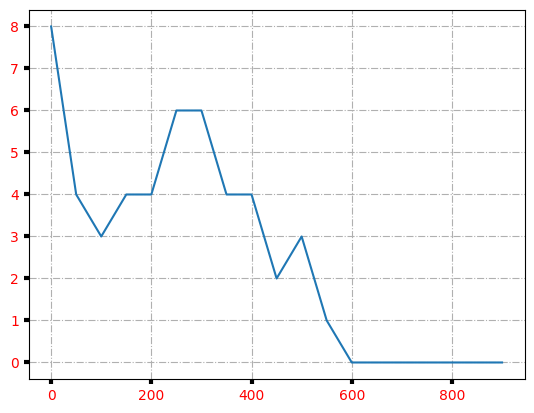

In [12]:
length_error  = len(n.error_by_training)
iterations = np.array(range(length_error)) * n.batch_testing

fig, ax = plt.subplots()
ax.plot(iterations, n.error_by_training)

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)

plt.show()

## Testing our unlabeled dataset

In [13]:
print('\n')
print("Samples Value\t","\t Prediction [Velo, Moto]")
for sample in prediction_dataset:
    result = list(n.query(sample))
    print("Sample",[sample[0],sample[1]],'\t Prediction',[result[0][0], result[1][0]])





Samples Value	 	 Prediction [Velo, Moto]
Sample [0.4, 0.8] 	 Prediction [0, 1]
Sample [0.8, 0.7] 	 Prediction [1, 0]
Sample [0.3, 0.9] 	 Prediction [0, 1]
Sample [0.1, 0.2] 	 Prediction [0, 1]


### Plot dataset after training and prediction

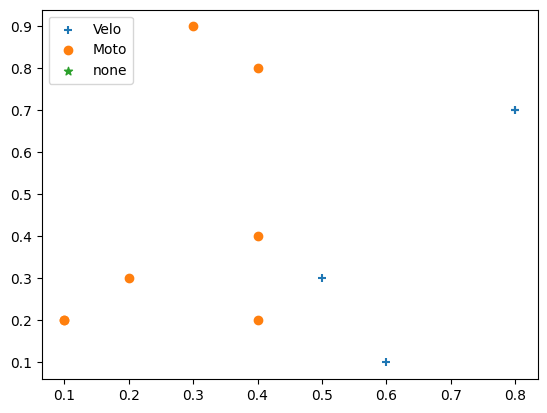

In [14]:
my_dataset = numpy.array(
    [
        # labled
        [[0.6, 0.1], [1, 0]],  # [Velo, Moto]
        [[0.1, 0.2], [0, 1]],
        [[0.2, 0.3], [0, 1]],
        [[0.4, 0.4], [0, 1]],
        [[0.4, 0.2], [0, 1]],
        [[0.5, 0.3], [1, 0]],
        [[0.8, 0.7], [1, 0]],
        # unlabeled
        [[0.4, 0.8], [0, 1]],
        [[0.8, 0.7], [1, 0]],
        [[0.3, 0.9], [0, 1]],
        [[0.1, 0.2], [0, 1]],
    ],
)

get_x = lambda x: [i[0] for i in x]
get_y = lambda x: [i[1] for i in x]

area1, area2, area3 = [], [], []

for sample, label in my_dataset:
    if label[0] == 1:
        area1.append(sample)
    elif label[0] == 0:
        area2.append(sample)
    else:
        area3.append(sample)

plt.scatter(get_x(area1), get_y(area1), label="Velo", marker="+")
plt.scatter(get_x(area2), get_y(area2), label="Moto", marker="o")
plt.scatter(get_x(area3), get_y(area3), label="none", marker="*")

plt.legend(["Velo", "Moto", "none"], loc="upper left")


plt.show()


### Show final weight 
#### Weight input -> hidden

In [15]:
print(n.weight_input_hidden)

[[-0.54022403 -0.31487416]
 [-0.10681749  0.13169417]
 [ 0.65145827 -0.44015792]]


#### Weight hidden output

In [16]:
print(n.weight_hidden_output)

[[-0.68578648 -0.11863297  0.62097983]
 [ 0.49045977  0.00624193 -0.38094399]]
